In [1]:
from collections import Counter
import data_analysis_tools as da

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])

    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])



data = [2, 2, 4, 4, 53, 52, 53, 53, 2, 2, 53, 53, 2]
all_one_time = range(20)


print(majority_vote(data))
print(majority_vote(all_one_time))

53
0


In [6]:
def knn_classify(k, labelled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    def distance(point):
        try:
            return da.euclidean(da.parser.parse_vector2float(point[0]), da.parser.parse_vector2float(new_point))
        except:
            print('Float parsing error!')
        
    by_distance = sorted(labelled_points, key=distance)

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)
    

print(da.file_ops.read_csv('./files/Iris.csv', keys=['Id','SepalLengthCm',
                        'SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'], sep=',')[1])
print(da.file_ops.read_csv('./files/Iris.csv', sep=',')[0])
print(da.file_ops.read_csv('./files/Iris.csv', sep=',', as_array=True)[1:4])
data = da.file_ops.read_csv('./files/Iris.csv', sep=',', as_array=True)

# some formatting

data.pop(0)
for i in range(len(data)):
    data[i].pop(0)
    data[i] = ([data[i][0], data[i][2]], data[i][4])
data[:10]
# we are only getting lengths of sepal and petal

{'Id': '1', 'SepalLengthCm': '5.1', 'SepalWidthCm': '3.5', 'PetalLengthCm': '1.4', 'PetalWidthCm': '0.2', 'Species': 'Iris-setosa'}
{'Id': '1', 'SepalLengthCm': '5.1', 'SepalWidthCm': '3.5', 'PetalLengthCm': '1.4', 'PetalWidthCm': '0.2', 'Species': 'Iris-setosa'}
[['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa']]


[(['5.1', '1.4'], 'Iris-setosa'),
 (['4.9', '1.4'], 'Iris-setosa'),
 (['4.7', '1.3'], 'Iris-setosa'),
 (['4.6', '1.5'], 'Iris-setosa'),
 (['5.0', '1.4'], 'Iris-setosa'),
 (['5.4', '1.7'], 'Iris-setosa'),
 (['4.6', '1.4'], 'Iris-setosa'),
 (['5.0', '1.5'], 'Iris-setosa'),
 (['4.4', '1.4'], 'Iris-setosa'),
 (['4.9', '1.5'], 'Iris-setosa')]

In [7]:
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plots = {label: ([], []) for label in labels}
markers = {labels[0]: "o", labels[1]: "s", labels[2]: "^"}
colors = {labels[0]: "r", labels[1]: "b", labels[2]: "g"}
print(plots)
print(markers)
print(colors)

{'Iris-setosa': ([], []), 'Iris-versicolor': ([], []), 'Iris-virginica': ([], [])}
{'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': '^'}
{'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}


['5.1', '4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9']
['1.4', '1.4', '1.3', '1.5', '1.4', '1.7', '1.4', '1.5', '1.4', '1.5']


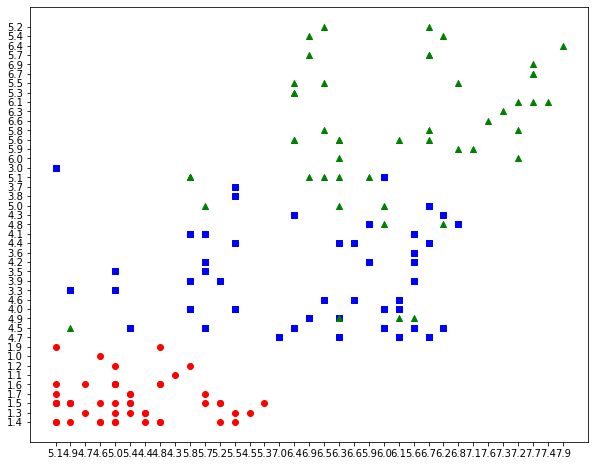

In [8]:
import matplotlib.pyplot as plt
for (sepal_length, petal_length), iris_type in data:
    plots[iris_type][0].append(sepal_length)
    plots[iris_type][1].append(petal_length)

print(plots["Iris-setosa"][0][:10])
print(plots["Iris-setosa"][1][:10])


plt.figure(figsize=(10, 8))
for iris_type, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[iris_type], marker=markers[iris_type], label=iris_type, zorder=10)

plt.show()

In [9]:
for k in [1, 3, 5, 7]:
    num_correct = 0

    for iris in data:
        features, label = iris
        other_irises = [other_iris for other_iris in data if other_iris!=iris]
        predicted_iris = knn_classify(k, other_irises, features)

        if predicted_iris == label:
            num_correct += 1

    print(f' k={k} neighbors: {num_correct}, correct out of: {len(data)} ')




 k=1 neighbors: 136, correct out of: 150 
 k=3 neighbors: 142, correct out of: 150 
 k=5 neighbors: 140, correct out of: 150 
 k=7 neighbors: 142, correct out of: 150 
